In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading data 
data = pd.read_csv("D:\\Study\\Downloads\\DataScience-Assignments\\PCA_wine.csv")
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Study\\Downloads\\DataScience-Assignments\\PCA_wine.csv'

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
scaled_data =  scaler.transform(data)

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [45]:
scaled_data.shape

(178, 14)

In [46]:
x_pca.shape

(178, 10)

In [47]:
var = pca.explained_variance_ratio_
var
pca.components_[0]

array([ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
       -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
        0.08931829, -0.27682265, -0.35052618, -0.26951525])

In [48]:
# Cumulative variance 

var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([39.54, 57.38, 67.71, 74.34, 80.61, 85.42, 89.38, 91.88, 93.98,
       95.85])

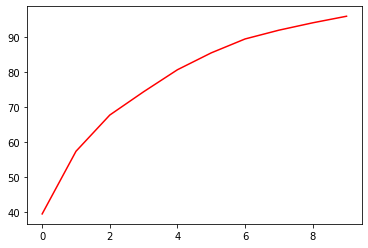

In [49]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [50]:
data.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

## Selected top 3 columns

In [37]:
X = data.drop(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue', 'Dilution', 'Proline'], axis=1, inplace=True)

In [51]:
X=data.iloc[:,[0,6,7]]

In [52]:
X.head()

,Type,Phenols,Flavanoids
0,1,2.80,3.06
1,1,2.65,2.76
2,1,2.80,3.24
3,1,3.85,3.49
4,1,2.80,2.69


## KMeans

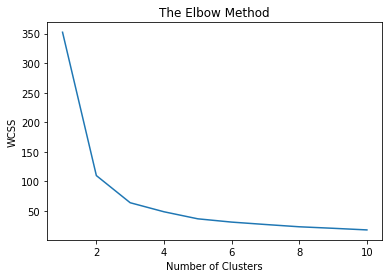

In [53]:
#Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [54]:
#Fitting K-MEans to the dataset
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [57]:
def norm_func(i):
    x = (i-i.min())	/	(i.max()	-	i.min())
    #x = (i-i.mean())/i.std()
    return (x)


# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(X)

In [58]:
df_norm.head()

,Type,Phenols,Flavanoids
0,0.0,0.627586,0.573840
1,0.0,0.575862,0.510549
2,0.0,0.627586,0.611814
3,0.0,0.989655,0.664557
4,0.0,0.627586,0.495781


In [61]:
###### screw plot or elbow curve ############
from scipy.spatial.distance import cdist
k = list(range(2,15))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x267191e1580>,
 <a list of 13 Text major ticklabel objects>)

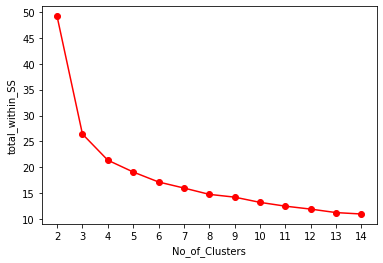

In [62]:
# Scree plot 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [64]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=4) 
model.fit(df_norm)

KMeans(n_clusters=4)

In [65]:
model.labels_ # getting the labels of clusters assigned to each row 
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 

## Heirarchical

In [67]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 

In [68]:
z = linkage(df_norm, method="complete",metric="euclidean")

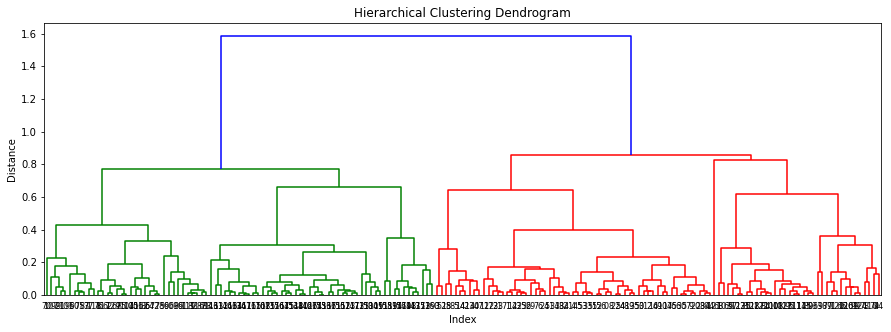

In [69]:
plt.figure(figsize=(15, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [70]:
# Now applying AgglomerativeClustering choosing 3 as clusters from the dendrogram
from sklearn.cluster import	AgglomerativeClustering 
h_complete	=	AgglomerativeClustering(n_clusters=4,linkage='complete',affinity = "euclidean").fit(df_norm) 

In [71]:
h_complete.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [72]:
cluster_labels=pd.Series(h_complete.labels_)